In [2]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


Using MXNet backend


Shape of training dataset : (50000, 3, 32, 32)
Shape of testing dataste : (10000, 3, 32, 32)


In [3]:
current_job_id = '003'
checkpoint_name = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
filepath = 'saved_models/'
epochs_n = 200

In [4]:
rglrzr = None #regularizers.l2(0.0003)
drop_out = 0.3

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=[3,32,32],kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(1024,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(1024,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)



#add some callbacks:
callbacks = []

checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath+current_job_id+checkpoint_name, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.000001, cooldown=0, min_lr=0)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

callbacks.append(checkpoint)
callbacks.append(reduce_lr)
callbacks.append(early_stopping)

Epoch 1/200


/home/shiqidai1002/anaconda3/lib/python3.7/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


782/782 [==============================] - 26s 33ms/step - loss: 2.6649 - acc: 0.1696 - val_loss: 3.3305 - val_acc: 0.0901
Epoch 2/200
782/782 [==============================] - 21s 27ms/step - loss: 2.2944 - acc: 0.2562 - val_loss: 2.5236 - val_acc: 0.1788
Epoch 3/200
782/782 [==============================] - 21s 27ms/step - loss: 2.1014 - acc: 0.2931 - val_loss: 2.8977 - val_acc: 0.2001
Epoch 4/200
782/782 [==============================] - 21s 27ms/step - loss: 2.0229 - acc: 0.3256 - val_loss: 1.8798 - val_acc: 0.3253
Epoch 5/200
782/782 [==============================] - 22s 28ms/step - loss: 1.9913 - acc: 0.3357 - val_loss: 1.9378 - val_acc: 0.3144
Epoch 6/200
782/782 [==============================] - 23s 29ms/step - loss: 1.9777 - acc: 0.3478 - val_loss: 1.8963 - val_acc: 0.3372
Epoch 7/200
782/782 [==============================] - 22s 28ms/step - loss: 1.8697 - acc: 0.3753 - val_loss: 4.0707 - val_acc: 0.2996
Epoch 8/200
782/782 [==============================] - 21s 27ms/ste

782/782 [==============================] - 21s 27ms/step - loss: 1.2035 - acc: 0.5964 - val_loss: 1.0119 - val_acc: 0.6464
Epoch 62/200
782/782 [==============================] - 21s 27ms/step - loss: 1.1927 - acc: 0.5978 - val_loss: 1.0026 - val_acc: 0.6453
Epoch 63/200
782/782 [==============================] - 22s 28ms/step - loss: 1.1988 - acc: 0.5971 - val_loss: 1.0056 - val_acc: 0.6431
Epoch 64/200
782/782 [==============================] - 21s 27ms/step - loss: 1.1932 - acc: 0.5984 - val_loss: 1.0108 - val_acc: 0.6425
Epoch 65/200
782/782 [==============================] - 21s 27ms/step - loss: 1.1789 - acc: 0.6025 - val_loss: 1.0070 - val_acc: 0.6452
Epoch 66/200
782/782 [==============================] - 21s 27ms/step - loss: 1.1861 - acc: 0.5971 - val_loss: 1.0067 - val_acc: 0.6447
Epoch 67/200
782/782 [==============================] - 21s 26ms/step - loss: 1.1796 - acc: 0.6023 - val_loss: 1.0054 - val_acc: 0.6452
Epoch 68/200
782/782 [==============================] - 21s 2

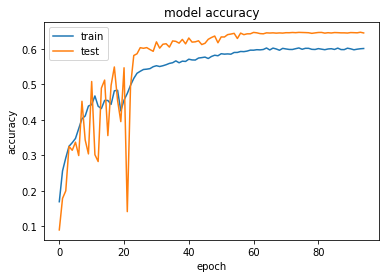

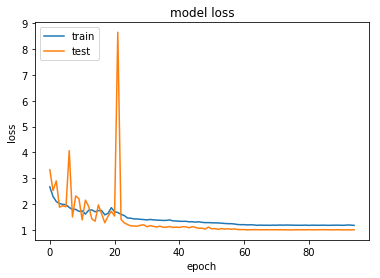

In [5]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64), 
                              epochs=epochs_n,
                              validation_data = (x_test,y_test),
                              callbacks = callbacks)
model.save(filepath + current_job_id)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()